In [10]:
import numpy as np
import pandas as pd
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix

In [11]:
data = pd.read_csv('../data/job_train.csv')
data.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0


<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x7f231032ed90>>

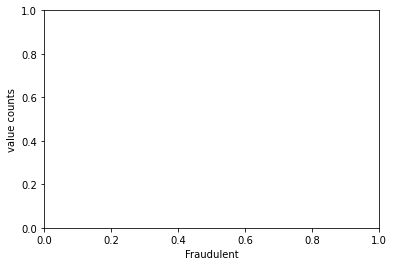

In [12]:
import matplotlib.pyplot as plt
plt.xlabel("Fraudulent")
plt.ylabel("value counts")
data.fraudulent.value_counts().plot.bar

In [3]:
unnecessary_columns = ['telecommuting','has_company_logo','has_questions']
for columns in unnecessary_columns:
    del data[columns]

data.fillna(' ',inplace=True)
data.head()


,title,location,description,requirements,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0


In [4]:
data.interpolate(inplace=True)
data.isnull().sum()


title           0
location        0
description     0
requirements    0
fraudulent      0
dtype: int64

In [5]:
data.head()
data.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

,fraudulent,title
0,0,8484
1,1,456


In [6]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         8940 non-null   object
 1   location      8940 non-null   object
 2   description   8940 non-null   object
 3   requirements  8940 non-null   object
 4   fraudulent    8940 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 349.3+ KB


<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x7f23111ba4f0>>

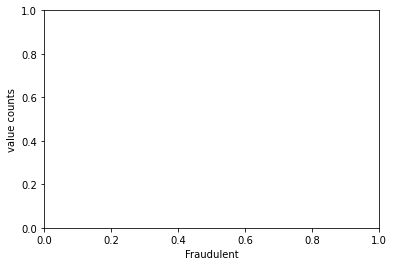

In [9]:
import matplotlib.pyplot as plt
plt.xlabel("Fraudulent")
plt.ylabel("value counts")
data.fraudulent.value_counts().plot.bar